In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# VGG Block

In [10]:
def vgg_block(num_convs,out_channels):
    layers=[]
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels,kernel_size=3,padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

# VGG Network

<div>
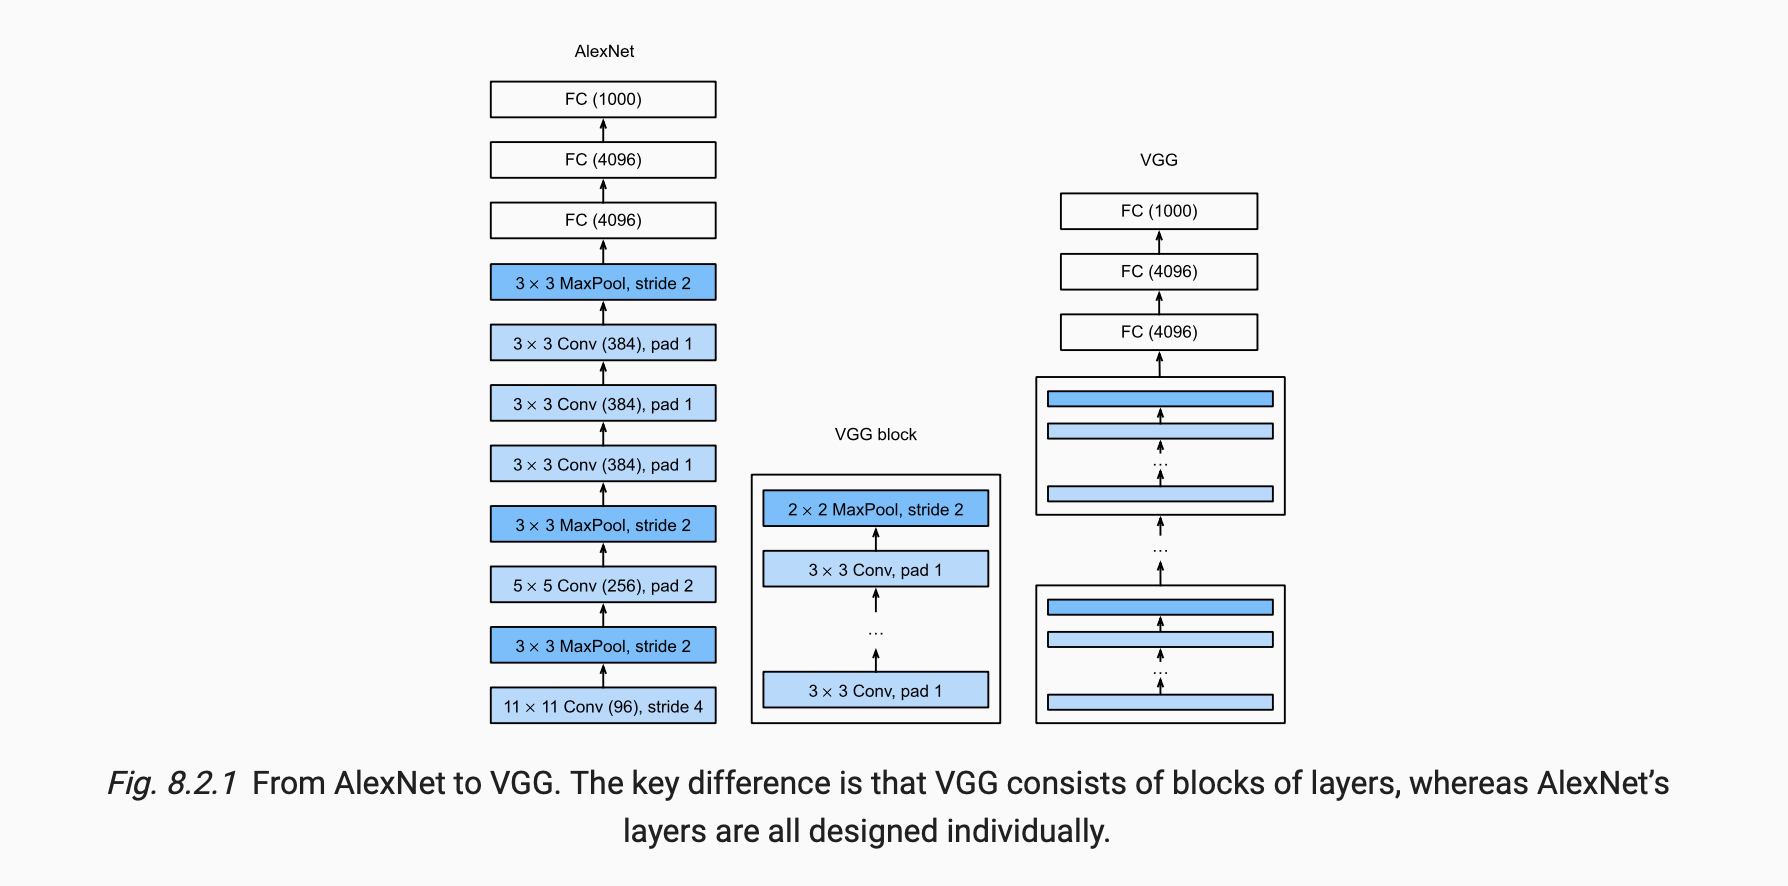
</div>

In [3]:
conv_arch=((1,64),(1,128),(2,254),(2,512),(2,512))

In [8]:
def vgg(conv_arch):
    net=nn.Sequential()
    
    
class VGG(d2l.Classifier):
    def __init__(self,arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks=[]
         # The convolutional layer part
        for num_convs,out_channels in conv_arch:
            conv_blks.append(vgg_block(num_convs,out_channels))
         # The fully connected layer part
        self.net=nn.Sequential(*conv_blks,nn.Flatten(),
                               nn.LazyLinear(4096),nn.ReLU(),nn.Dropout(p=0.5),
                               nn.LazyLinear(4096),nn.ReLU(),nn.Dropout(p=0.5),
                               nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [11]:
VGG(conv_arch).layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 254, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)